# Project NBA 



* This work is investigating possible relationships between NBA players characteristics and their field performance

* Aggreagated data of NBA season stats from 1982 to 2018 was analyzed, about 1500 NBA players 

* Independent variables: players height and weight, their average age, number of years played and teams rank

* Dependent variables: filed performance characteristics, such as points, rebounds, assist/block percentage, true shooting %, etc. (More than 40 found, 21 were analyzed)
* Includes portion with data retrieval from sportsreference library. Skip to the line to read from ready csv file; or install to run:

     pip install sportsreference



In [1]:
# Dependencies and Setup
import pandas as pd
import csv
import os


# File to Load (change path, if needed)
season_data = "Resources/Seasons_stats.csv"
players = "Resources/Players.csv"
player_data = "Resources/player_data.csv"

In [2]:
# Read seasons_stats data and NBA Players Data Files and store into Pandas Data Frames; 
# Mergeing two data sets for NBA players

season_data_df = pd.read_csv(season_data, low_memory=False)
del season_data_df['Unnamed: 0']
season_data_df.head()


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
season_data_df = season_data_df.sort_values(['Year'], ascending=False)
season_data_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


In [4]:
players_df = pd.read_csv(players, low_memory=False)
del players_df['Unnamed: 0']
players_df

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [5]:
clean_players_df = players_df[['Player', 'height', 'weight']]
clean_players_df

,Player,height,weight
0,Curly Armstrong,180.0,77.0
1,Cliff Barker,188.0,83.0
2,Leo Barnhorst,193.0,86.0
3,Ed Bartels,196.0,88.0
4,Ralph Beard,178.0,79.0
...,...,...,...
3917,Troy Williams,198.0,97.0
3918,Kyle Wiltjer,208.0,108.0
3919,Stephen Zimmerman,213.0,108.0
3920,Paul Zipser,203.0,97.0


In [6]:
player_data_df = pd.read_csv(player_data, low_memory=False)
player_data_df

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [7]:
clean_player_data_df = player_data_df[['name', 'year_start', 'year_end', 'position', 'weight']]
clean_player_data_df

,name,year_start,year_end,position,weight
0,Alaa Abdelnaby,1991,1995,F-C,240.0
1,Zaid Abdul-Aziz,1969,1978,C-F,235.0
2,Kareem Abdul-Jabbar,1970,1989,C,225.0
3,Mahmoud Abdul-Rauf,1991,2001,G,162.0
4,Tariq Abdul-Wahad,1998,2003,F,223.0
...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,250.0
4546,Jim Zoet,1983,1983,C,240.0
4547,Bill Zopf,1971,1971,G,170.0
4548,Ivica Zubac,2017,2018,C,265.0


In [8]:
clean_player_data_df = clean_player_data_df.rename(columns={"name":"Player", "position":"Career position"})
clean_player_data_df

,Player,year_start,year_end,Career position,weight
0,Alaa Abdelnaby,1991,1995,F-C,240.0
1,Zaid Abdul-Aziz,1969,1978,C-F,235.0
2,Kareem Abdul-Jabbar,1970,1989,C,225.0
3,Mahmoud Abdul-Rauf,1991,2001,G,162.0
4,Tariq Abdul-Wahad,1998,2003,F,223.0
...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,250.0
4546,Jim Zoet,1983,1983,C,240.0
4547,Bill Zopf,1971,1971,G,170.0
4548,Ivica Zubac,2017,2018,C,265.0


In [9]:
all_players_data_df = pd.merge(clean_player_data_df, clean_players_df, how = 'left', on=['Player'])
all_players_data_df

,Player,year_start,year_end,Career position,weight_x,height,weight_y
0,Alaa Abdelnaby,1991,1995,F-C,240.0,208.0,108.0
1,Zaid Abdul-Aziz,1969,1978,C-F,235.0,206.0,106.0
2,Kareem Abdul-Jabbar,1970,1989,C,225.0,NaN,NaN
3,Mahmoud Abdul-Rauf,1991,2001,G,162.0,188.0,83.0
4,Tariq Abdul-Wahad,1998,2003,F,223.0,198.0,101.0
...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,250.0,NaN,NaN
4546,Jim Zoet,1983,1983,C,240.0,216.0,108.0
4547,Bill Zopf,1971,1971,G,170.0,185.0,77.0
4548,Ivica Zubac,2017,2018,C,265.0,216.0,120.0


In [10]:
all_players_data_df = all_players_data_df.dropna()
all_players_data_df

,Player,year_start,year_end,Career position,weight_x,height,weight_y
0,Alaa Abdelnaby,1991,1995,F-C,240.0,208.0,108.0
1,Zaid Abdul-Aziz,1969,1978,C-F,235.0,206.0,106.0
3,Mahmoud Abdul-Rauf,1991,2001,G,162.0,188.0,83.0
4,Tariq Abdul-Wahad,1998,2003,F,223.0,198.0,101.0
5,Shareef Abdur-Rahim,1997,2008,F,225.0,206.0,102.0
...,...,...,...,...,...,...,...
4543,Stephen Zimmerman,2017,2017,C,240.0,213.0,108.0
4544,Paul Zipser,2017,2018,G-F,215.0,203.0,97.0
4546,Jim Zoet,1983,1983,C,240.0,216.0,108.0
4547,Bill Zopf,1971,1971,G,170.0,185.0,77.0


In [11]:
all_players_data_df = all_players_data_df.rename(columns={
    "weight_x":"Weight (lb)",
    "height":"Height (cm)",
    "weight_y":"Weight (kg)",
    })
all_players_data_df

,Player,year_start,year_end,Career position,Weight (lb),Height (cm),Weight (kg)
0,Alaa Abdelnaby,1991,1995,F-C,240.0,208.0,108.0
1,Zaid Abdul-Aziz,1969,1978,C-F,235.0,206.0,106.0
3,Mahmoud Abdul-Rauf,1991,2001,G,162.0,188.0,83.0
4,Tariq Abdul-Wahad,1998,2003,F,223.0,198.0,101.0
5,Shareef Abdur-Rahim,1997,2008,F,225.0,206.0,102.0
...,...,...,...,...,...,...,...
4543,Stephen Zimmerman,2017,2017,C,240.0,213.0,108.0
4544,Paul Zipser,2017,2018,G-F,215.0,203.0,97.0
4546,Jim Zoet,1983,1983,C,240.0,216.0,108.0
4547,Bill Zopf,1971,1971,G,170.0,185.0,77.0


In [13]:
season_data_1982_df = season_data_df.loc[(season_data_df['Year'] >= 1982)]
season_data_1982_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,1982.0,Mike Newlin,SG,33.0,NYK,76.0,32.0,1507.0,11.5,0.519,...,0.857,36.0,55.0,91.0,170.0,33.0,3.0,104.0,194.0,705.0
6703,1982.0,Kurt Nimphius,C,23.0,DAL,63.0,27.0,1085.0,12.0,0.489,...,0.583,92.0,203.0,295.0,61.0,17.0,82.0,56.0,190.0,337.0
6699,1982.0,Swen Nater,C,32.0,SDC,21.0,7.0,575.0,16.4,0.625,...,0.747,46.0,146.0,192.0,30.0,6.0,9.0,48.0,64.0,262.0
6698,1982.0,Larry Nance,PF,22.0,PHO,80.0,0.0,1186.0,14.7,0.543,...,0.641,95.0,161.0,256.0,82.0,42.0,71.0,104.0,169.0,529.0




^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
* Data retrieval from sportsreferences library (takes ~2 min to run). Skip to csv data read line 

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [211]:
#Data retrieval about NBA teams ranks throughout 1982 to 2018 

teams_years = pd.DataFrame()
teams_years ["Year"] = ""
teams_years ["Team Name"] = ""
teams_years ["Team Abbreviation"] = ""
teams_years ["Rank"] = ""
teams_years

,Year,Team Name,Team Abbreviation,Rank


In [212]:
from sportsreference.nba.teams import Teams

ycount = 0
for Year in range(1982, 2018): 
    names = []
    abbrs = []
    ranks = []

    teams = Teams(year=Year)
    for team in teams:
        name = team.name
        abbr = team.abbreviation
        rank = team.rank
    
        names.append (name)
        abbrs.append(abbr)
        ranks.append(rank)
    
    for i in range(ycount, (len(names)+ycount)):
        teams_years.loc[i, "Year"] = Year
        teams_years.loc[i, "Team Name"] = names[i-ycount]
        teams_years.loc[i, "Team Abbreviation"] = abbrs[i-ycount]
        teams_years.loc[i, "Rank"] = ranks[i-ycount]
    
    ycount =ycount + len(names)

teams_years


,Year,Team Name,Team Abbreviation,Rank
0,1982,Denver Nuggets,DEN,1
1,1982,Los Angeles Lakers,LAL,2
2,1982,San Antonio Spurs,SAS,3
3,1982,Boston Celtics,BOS,4
4,1982,Philadelphia 76ers,PHI,5
...,...,...,...,...
994,2017,Detroit Pistons,DET,26
995,2017,Orlando Magic,ORL,27
996,2017,Utah Jazz,UTA,28
997,2017,Memphis Grizzlies,MEM,29


In [25]:
teams_years.to_csv("resources/teams_years_rank_1982_2017.csv")

In [14]:
# Read csv file for the teams rank data

teams_years_df = pd.read_csv("resources/teams_years_rank_1982_2017.csv", low_memory=False)
teams_years_df.head()

,Unnamed: 0,Year,Team Name,Team Abbreviation,Rank
0,0,1982,Denver Nuggets,DEN,1
1,1,1982,Los Angeles Lakers,LAL,2
2,2,1982,San Antonio Spurs,SAS,3
3,3,1982,Boston Celtics,BOS,4
4,4,1982,Philadelphia 76ers,PHI,5


In [15]:
teams_years_df = teams_years_df.sort_values(['Year'], ascending=False)
del teams_years_df['Unnamed: 0']
teams_years_df = teams_years_df.reset_index(drop=True)
teams_years_df = teams_years_df.rename(columns={"Rank":"Team Rank"})
teams_years_df.head()

,Year,Team Name,Team Abbreviation,Team Rank
0,2017,Dallas Mavericks,DAL,30
1,2017,Indiana Pacers,IND,15
2,2017,Golden State Warriors,GSW,1
3,2017,Houston Rockets,HOU,2
4,2017,Denver Nuggets,DEN,3


In [16]:
#Columns abbtevations file from kaggle.com

colum_abbr = pd.read_csv("Resources/Abbr_kaggle.csv")
colum_abbr.head()

,Abbr,Full Name
0,G,Games
1,GS,Games Started
2,MP,Minutes Played
3,PER,Player Efficiency Rating
4,TS%,True Shooting %


In [17]:
# Renaming columns for seasons_stats data for better understanding

season_data_1982_df
season_data_1982_df = season_data_1982_df.reset_index(drop=True)
season_data_1982_df = season_data_1982_df.rename(columns={
     'Tm':'Team Abbreviation',
     'G':'Games',
     'GS':'Games Started',
     'MP': 'Minutes Played',
     'PER':'Player Efficiency Rating',
     'TS%':'True Shooting %',
     '3PAr':'3-Point Attempt Rate',
     'FTr':'Free Throw Rate',
     'ORB%':'Offensive Rebound Percentage',
     'DRB%':'Defensive Rebound Percentage',
     'TRB%':'Total Rebound Percentage',
     'AST%':'Assist Percentage',
     'STL%':'Steal Percentage',
     'BLK%':'Block Percentage',
     'TOV%':'Turnover Percentage',
     'USG%':'Usage Percentage',
     'blanl':'empty',
     'OWS':'Offensive Win Shares',
     'DWS':'Defensive Win Shares',
     'WS':'Win Shares',
     'WS/48':'Win Shares Per 48 Minutes',
     'blank2':'empty',
     'OBPM':'Offensive Box Plus/Minus',
     'DBPM':'Defensive Box Plus/Minus',
     'BPM':'Box Plus/Minus',
     'VORP':'Value Over Replacement',
     'FG':'Field Goals',
     'FGA':'Field Goal Attempts',
     'FG%':'Field Goal Percentage',
     '3P':'3-Point Field Goals',
     '3PA':'3-Point Field Goal Attempts',
     '3P%':'3-Point Field Goal Percentage',
     '2P':'2-Point Field Goals',
     '2PA':'2-Point Field Goal Attempts',
     '2P%':'2-Point Field Goal Percentage',
     'eFG%':'Effective Field Goal Percentage',
     'FT':'Free Throws',
     'FTA':'Free Throw Attempts',
     'FT%':'Free Throw Percentage',
     'ORB':'Offensive Rebounds',
     'DRB': 'Defensive Rebounds',
     'TRB':'Total Rebounds',
     'AST':'Assists',
     'STL':'Steals',
     'BLK':'Blocks',
     'TOV': 'Turnovers',
     'PF':'Personal Fouls',
     'PTS':'Points'    
    })
season_data_1982_df.head()

,Year,Player,Pos,Age,Team Abbreviation,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
1,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
2,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
3,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
4,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


In [18]:
del season_data_1982_df['empty']
season_data_1982_df.head()

,Year,Player,Pos,Age,Team Abbreviation,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
1,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
2,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
3,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
4,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


In [20]:
# Merging seasons_stats data with the teams rank data  

season_team_df = pd.merge(season_data_1982_df, teams_years_df, how="left", on=["Year", "Team Abbreviation"])
season_team_df.head()


,Year,Player,Pos,Age,Team Abbreviation,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank
0,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0,Los Angeles Lakers,17.0
1,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0,Boston Celtics,7.0
2,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0,San Antonio Spurs,14.0
3,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0,Chicago Bulls,23.0
4,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0,Oklahoma City Thunder,11.0


In [31]:
# season_team_df.to_csv("output/season_team_1982_2017.csv") 


In [27]:
# Merging Players and their teams data with season_stats data 

players_season_df = pd.merge(all_players_data_df, season_team_df, how="left", on=["Player"])

# Calculating years played for the players

players_season_df['Years Played'] = players_season_df['year_end'] - players_season_df['year_start']
del players_season_df['year_start']
del players_season_df['year_end']
players_season_df

,Player,Career position,Weight (lb),Height (cm),Weight (kg),Year,Pos,Age,Team Abbreviation,Games,...,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Name,Team Rank,Years Played
0,Alaa Abdelnaby,F-C,240.0,208.0,108.0,1995.0,PF,26.0,TOT,54.0,...,114.0,13.0,15.0,12.0,45.0,104.0,256.0,NaN,NaN,4
1,Alaa Abdelnaby,F-C,240.0,208.0,108.0,1995.0,PF,26.0,SAC,51.0,...,106.0,13.0,15.0,12.0,40.0,102.0,254.0,Sacramento Kings,19.0,4
2,Alaa Abdelnaby,F-C,240.0,208.0,108.0,1995.0,PF,26.0,PHI,3.0,...,8.0,0.0,0.0,0.0,5.0,2.0,2.0,Philadelphia 76ers,25.0,4
3,Alaa Abdelnaby,F-C,240.0,208.0,108.0,1994.0,PF,25.0,BOS,13.0,...,46.0,3.0,2.0,3.0,17.0,20.0,64.0,Boston Celtics,16.0,4
4,Alaa Abdelnaby,F-C,240.0,208.0,108.0,1993.0,PF,24.0,TOT,75.0,...,337.0,27.0,25.0,26.0,97.0,189.0,578.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19084,Stephen Zimmerman,C,240.0,213.0,108.0,2017.0,C,20.0,ORL,19.0,...,35.0,4.0,2.0,5.0,3.0,17.0,23.0,Orlando Magic,27.0,0
19085,Paul Zipser,G-F,215.0,203.0,97.0,2017.0,SF,22.0,CHI,44.0,...,125.0,36.0,15.0,16.0,40.0,78.0,240.0,Chicago Bulls,23.0,1
19086,Jim Zoet,C,240.0,216.0,108.0,1983.0,C,29.0,DET,7.0,...,8.0,1.0,1.0,3.0,4.0,9.0,2.0,Detroit Pistons,6.0,0
19087,Bill Zopf,G,170.0,185.0,77.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [219]:
players_season_df['Career position'].value_counts()

G      6567
F      4855
C      2157
F-C    2060
G-F    1552
F-G    1004
C-F     894
Name: Career position, dtype: int64

In [30]:
len(players_season_df['Player'].unique()) 

3761

In [31]:
# It is possible to break players into different positions group and repeat the same analysis below


# GPos_player = players_season_df.loc[(players_season_df['Career position'] == 'G')|
#                                         (players_season_df['Career position'] == 'G-F')]
# GPos_player_mean = GPos_player.groupby(['Player']).mean()

In [32]:
# Calculate average data for players

AllPos_player_mean = players_season_df.groupby(['Player']).mean()
AllPos_player_mean

,Weight (lb),Height (cm),Weight (kg),Year,Age,Games,Games Started,Minutes Played,Player Efficiency Rating,True Shooting %,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Team Rank,Years Played
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,220.0,203.0,106.0,1993.888889,29.888889,75.611111,50.277778,2169.111111,13.872222,0.543556,...,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222,10.764706,15.0
A.J. Bramlett,227.0,196.0,88.0,2000.000000,23.000000,8.000000,0.000000,61.000000,-0.400000,0.190000,...,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000,18.000000,0.0
A.J. English,175.0,196.0,95.0,1991.500000,23.500000,75.500000,9.000000,1554.000000,11.550000,0.480000,...,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000,20.500000,1.0
A.J. Guyton,180.0,208.0,99.0,2002.000000,23.000000,26.666667,4.666667,415.333333,4.366667,0.324000,...,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333,19.666667,2.0
A.J. Hammons,260.0,198.0,99.0,2017.000000,24.000000,22.000000,0.000000,163.000000,8.400000,0.472000,...,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000,30.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeljko Rebraca,257.0,213.0,116.0,2004.000000,31.000000,34.142857,3.428571,507.571429,12.728571,0.558143,...,75.285714,106.571429,13.428571,8.857143,24.428571,31.428571,80.571429,195.285714,19.833333,4.0
Zendon Hamilton,250.0,211.0,113.0,2004.125000,28.125000,18.250000,1.875000,201.125000,13.400000,0.493375,...,36.000000,59.375000,4.125000,5.375000,3.500000,14.250000,27.500000,76.375000,19.571429,5.0
Zoran Dragic,200.0,196.0,90.0,2015.000000,25.000000,10.666667,0.666667,50.000000,8.433333,0.412667,...,2.000000,5.333333,3.333333,1.333333,0.000000,3.333333,4.000000,18.666667,19.000000,0.0


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sn

from scipy.stats import linregress


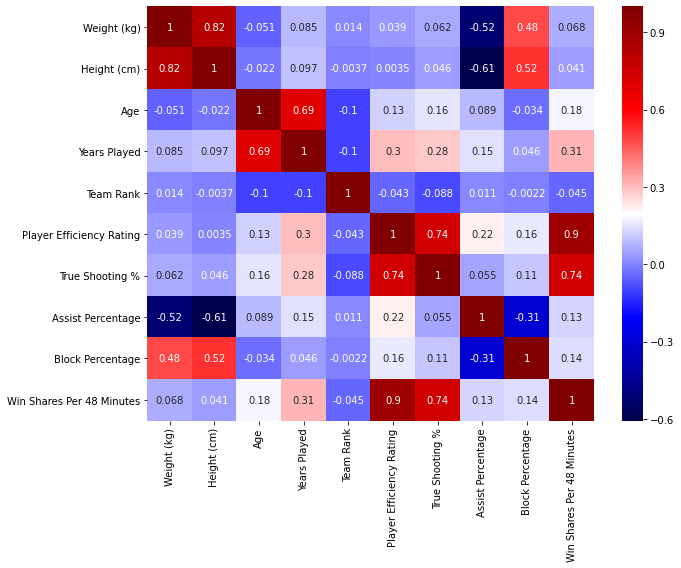

In [34]:
# Set1 : Dependent Variables correlation maps


# Player Efficiency Rating',
# True Shooting %', 
# 'Assist Percentage', 
# Block Percentage', 
# 'Win Shares Per 48 Minutes'

AllPos_set1 = pd.DataFrame(AllPos_player_mean, columns=[
    'Weight (kg)', 'Height (cm)', 'Age', 'Years Played', 'Team Rank',
    'Player Efficiency Rating','True Shooting %', 'Assist Percentage', 
    'Block Percentage', 'Win Shares Per 48 Minutes',
    ])
corrMatrix = AllPos_set1.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
fig_name = "Allpos_set1"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
#cmap='cool'
plt.show()

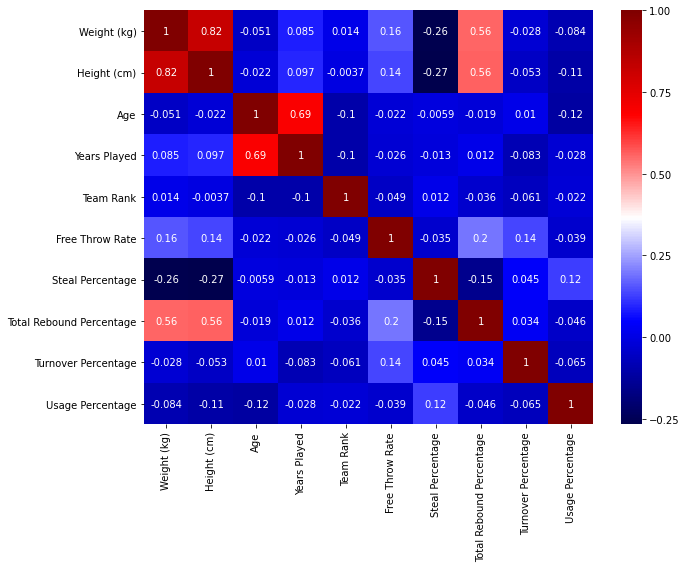

In [35]:
# Set2 : Dependent Variables correlation maps


# Free Throw Rate
# Total Rebound Percentage
# Steal Percentage
# Turnover Percentage
# Usage Percentage

AllPos_set2 = pd.DataFrame(AllPos_player_mean, columns=[
    'Weight (kg)', 'Height (cm)', 'Age', 'Years Played', 'Team Rank',
    'Free Throw Rate','Steal Percentage', 'Total Rebound Percentage', 
    'Turnover Percentage', 'Usage Percentage',
    ])
corrMatrix = AllPos_set2.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "AllPos_set2"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

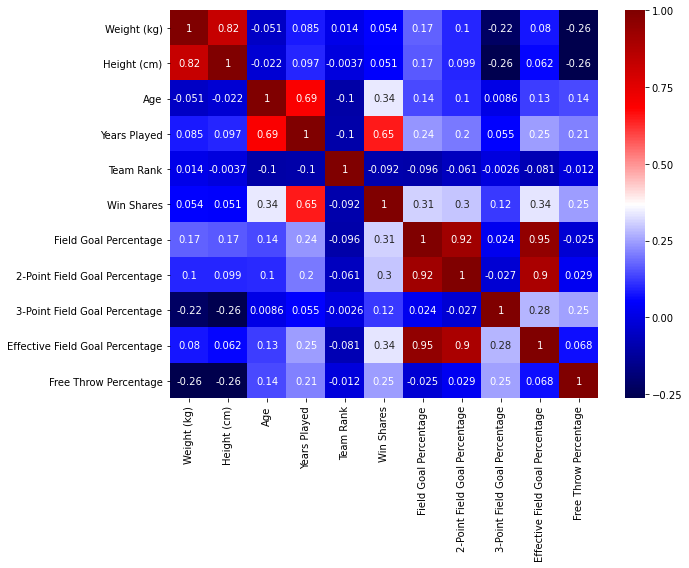

In [36]:
# Set3 : Dependent Variables correlation maps


# Win Shares
# Field Goal Percentage
# 2-Point Field Goal Percentage
# 3-Point Field Goal Percentage
# Effective Field Goal Percentage
# Free Throw Percentage

AllPos_set3 = pd.DataFrame(AllPos_player_mean, columns=[
    'Weight (kg)', 'Height (cm)', 'Age', 'Years Played', 'Team Rank',
    'Win Shares','Field Goal Percentage', '2-Point Field Goal Percentage', 
    '3-Point Field Goal Percentage', 'Effective Field Goal Percentage',
    'Free Throw Percentage'
    ])
corrMatrix = AllPos_set3.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "AllPos_set3"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

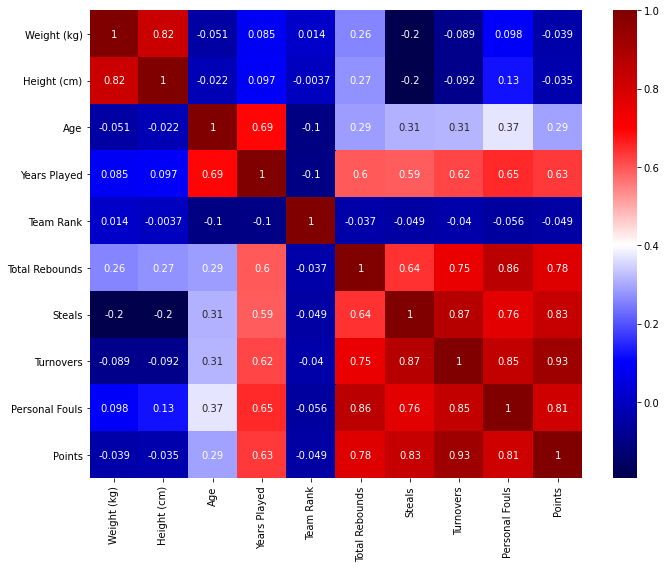

In [37]:
# Set4 : Dependent Variables correlation maps


# Total Rebounds
# Steals
# Turnovers
# Personal Fouls
# Points

AllPos_set4 = pd.DataFrame(AllPos_player_mean, columns=[
    'Weight (kg)', 'Height (cm)', 'Age', 'Years Played', 'Team Rank',
    'Total Rebounds','Steals', 'Turnovers', 
    'Personal Fouls', 'Points'
    ])
corrMatrix = AllPos_set4.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
#cmap='cool'
fig_name = "AllPos_set4"
plt.tight_layout()
plt.savefig(f"output/{fig_name}.png")
plt.show()

In [38]:
# Empty Data Frame to populate only with cloumns with found strong correlations

obs_corrs_phys = pd.DataFrame()
obs_corrs_phys ["Weight (kg)"] = ""
obs_corrs_phys ["Height (cm)"] = ""
obs_corrs_phys ['Age'] = ""
obs_corrs_phys ['Years Played'] = ""

obs_corrs_phys ['Player Efficiency Rating'] = ""
obs_corrs_phys ['True Shooting %'] = ""
obs_corrs_phys ['Assist Percentage'] = ""
obs_corrs_phys ['Block Percentage'] = ""

obs_corrs_phys ['Steal Percentage'] = ""
obs_corrs_phys ['Total Rebound Percentage'] = ""
obs_corrs_phys ['Win Shares'] = ""
obs_corrs_phys ['3-Point Field Goal Percentage'] = ""
obs_corrs_phys ['2-Point Field Goal Percentage'] = ""
obs_corrs_phys ['Free Throw Percentage'] = ""
obs_corrs_phys ['Turnovers'] = "" 
obs_corrs_phys ['Personal Fouls'] = "" 
obs_corrs_phys ['Points'] = ""
obs_corrs_phys ['Total Rebounds'] = ""
obs_corrs_phys ['Steals'] = "" 
obs_corrs_phys ['Win Shares Per 48 Minutes'] = ""

obs_corrs_phys

,Weight (kg),Height (cm),Age,Years Played,Player Efficiency Rating,True Shooting %,Assist Percentage,Block Percentage,Steal Percentage,Total Rebound Percentage,Win Shares,3-Point Field Goal Percentage,2-Point Field Goal Percentage,Free Throw Percentage,Turnovers,Personal Fouls,Points,Total Rebounds,Steals,Win Shares Per 48 Minutes


In [39]:

obs_corrs_phys ["Weight (kg)"] = AllPos_player_mean["Weight (kg)"]
obs_corrs_phys ["Height (cm)"] = AllPos_player_mean["Height (cm)"]
obs_corrs_phys ['Age'] = AllPos_player_mean['Age']
obs_corrs_phys ['Years Played'] = AllPos_player_mean['Years Played']

obs_corrs_phys ['Player Efficiency Rating'] = AllPos_player_mean['Player Efficiency Rating']
obs_corrs_phys ['True Shooting %'] = AllPos_player_mean['True Shooting %']
obs_corrs_phys ['Assist Percentage'] = AllPos_player_mean['Assist Percentage']
obs_corrs_phys ['Block Percentage'] = AllPos_player_mean['Block Percentage']
obs_corrs_phys ['Turnovers'] = AllPos_player_mean['Turnovers'] 
obs_corrs_phys ['Personal Fouls'] = AllPos_player_mean['Personal Fouls']
obs_corrs_phys ['Total Rebounds'] = AllPos_player_mean['Total Rebounds']

obs_corrs_phys ['Steal Percentage'] = AllPos_player_mean['Steal Percentage']
obs_corrs_phys ['Total Rebound Percentage'] = AllPos_player_mean['Total Rebound Percentage']
obs_corrs_phys ['Win Shares'] = AllPos_player_mean['Win Shares']
obs_corrs_phys ['3-Point Field Goal Percentage'] = AllPos_player_mean['3-Point Field Goal Percentage']
obs_corrs_phys ['2-Point Field Goal Percentage'] = AllPos_player_mean ['2-Point Field Goal Percentage']
obs_corrs_phys ['Free Throw Percentage'] = AllPos_player_mean['Free Throw Percentage']
obs_corrs_phys ['Steals'] = AllPos_player_mean['Steals']
obs_corrs_phys ['Points'] = AllPos_player_mean['Points']
obs_corrs_phys ['Win Shares Per 48 Minutes'] = AllPos_player_mean ['Win Shares Per 48 Minutes']

obs_corrs_phys


,Weight (kg),Height (cm),Age,Years Played,Player Efficiency Rating,True Shooting %,Assist Percentage,Block Percentage,Steal Percentage,Total Rebound Percentage,Win Shares,3-Point Field Goal Percentage,2-Point Field Goal Percentage,Free Throw Percentage,Turnovers,Personal Fouls,Points,Total Rebounds,Steals,Win Shares Per 48 Minutes
Player,,,,,,,,,,,,,,,,,,,,
A.C. Green,106.0,203.0,29.888889,15.0,13.872222,0.543556,5.216667,0.850000,1.438889,14.655556,5.788889,0.146833,0.501889,0.708056,83.777778,143.388889,718.222222,562.722222,61.277778,0.122111
A.J. Bramlett,88.0,196.0,23.000000,0.0,-0.400000,0.190000,0.000000,0.000000,0.800000,20.100000,-0.200000,NaN,0.190000,NaN,3.000000,13.000000,8.000000,22.000000,1.000000,-0.129000
A.J. English,95.0,196.0,23.500000,1.0,11.550000,0.480000,15.850000,0.450000,0.900000,5.550000,0.550000,0.136500,0.450500,0.774000,101.500000,143.500000,751.000000,157.500000,28.500000,0.016500
A.J. Guyton,99.0,208.0,23.000000,2.0,4.366667,0.324000,23.466667,0.500000,2.466667,2.533333,0.100000,0.255000,0.254000,0.824000,20.666667,19.333333,147.333333,26.666667,6.666667,-0.141333
A.J. Hammons,99.0,198.0,24.000000,0.0,8.400000,0.472000,3.800000,7.200000,0.300000,12.800000,0.000000,0.500000,0.375000,0.450000,10.000000,21.000000,48.000000,36.000000,1.000000,-0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeljko Rebraca,116.0,213.0,31.000000,4.0,12.728571,0.558143,4.700000,3.257143,0.800000,11.657143,1.242857,NaN,0.505429,0.747286,31.428571,80.571429,195.285714,106.571429,8.857143,0.100429
Zendon Hamilton,113.0,211.0,28.125000,5.0,13.400000,0.493375,1.625000,0.475000,4.187500,15.162500,0.400000,NaN,0.370125,0.679250,14.250000,27.500000,76.375000,59.375000,5.375000,0.051750
Zoran Dragic,90.0,196.0,25.000000,0.0,8.433333,0.412667,11.366667,0.000000,1.033333,7.866667,-0.033333,0.182333,0.543000,0.589000,3.333333,4.000000,18.666667,5.333333,1.333333,-0.051333


In [40]:
#Drop players with missing data

obs_corrs_phys = obs_corrs_phys.dropna()
obs_corrs_phys

,Weight (kg),Height (cm),Age,Years Played,Player Efficiency Rating,True Shooting %,Assist Percentage,Block Percentage,Steal Percentage,Total Rebound Percentage,Win Shares,3-Point Field Goal Percentage,2-Point Field Goal Percentage,Free Throw Percentage,Turnovers,Personal Fouls,Points,Total Rebounds,Steals,Win Shares Per 48 Minutes
Player,,,,,,,,,,,,,,,,,,,,
A.C. Green,106.0,203.0,29.888889,15.0,13.872222,0.543556,5.216667,0.850000,1.438889,14.655556,5.788889,0.146833,0.501889,0.708056,83.777778,143.388889,718.222222,562.722222,61.277778,0.122111
A.J. English,95.0,196.0,23.500000,1.0,11.550000,0.480000,15.850000,0.450000,0.900000,5.550000,0.550000,0.136500,0.450500,0.774000,101.500000,143.500000,751.000000,157.500000,28.500000,0.016500
A.J. Guyton,99.0,208.0,23.000000,2.0,4.366667,0.324000,23.466667,0.500000,2.466667,2.533333,0.100000,0.255000,0.254000,0.824000,20.666667,19.333333,147.333333,26.666667,6.666667,-0.141333
A.J. Hammons,99.0,198.0,24.000000,0.0,8.400000,0.472000,3.800000,7.200000,0.300000,12.800000,0.000000,0.500000,0.375000,0.450000,10.000000,21.000000,48.000000,36.000000,1.000000,-0.001000
A.J. Price,124.0,213.0,26.333333,5.0,10.388889,0.435000,22.733333,0.088889,1.277778,5.577778,0.555556,0.242889,0.444667,0.632250,27.000000,28.000000,184.000000,45.444444,14.666667,0.021444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zarko Paspalj,97.0,206.0,23.000000,0.0,4.300000,0.406000,7.800000,2.400000,0.800000,9.300000,-0.300000,0.000000,0.346000,0.818000,21.000000,37.000000,72.000000,30.000000,3.000000,-0.072000
Zaza Pachulia,122.0,211.0,25.500000,14.0,14.042857,0.535286,8.978571,1.328571,1.757143,16.207143,3.357143,0.000000,0.467071,0.743429,94.000000,176.071429,483.857143,409.214286,49.928571,0.106714
Zoran Dragic,90.0,196.0,25.000000,0.0,8.433333,0.412667,11.366667,0.000000,1.033333,7.866667,-0.033333,0.182333,0.543000,0.589000,3.333333,4.000000,18.666667,5.333333,1.333333,-0.051333


In [41]:
# Choose players with yeras_played experince above zero average years

obs_corrs_phys = obs_corrs_phys[(obs_corrs_phys["Years Played"] > 0)]
obs_corrs_phys

,Weight (kg),Height (cm),Age,Years Played,Player Efficiency Rating,True Shooting %,Assist Percentage,Block Percentage,Steal Percentage,Total Rebound Percentage,Win Shares,3-Point Field Goal Percentage,2-Point Field Goal Percentage,Free Throw Percentage,Turnovers,Personal Fouls,Points,Total Rebounds,Steals,Win Shares Per 48 Minutes
Player,,,,,,,,,,,,,,,,,,,,
A.C. Green,106.0,203.0,29.888889,15.0,13.872222,0.543556,5.216667,0.850000,1.438889,14.655556,5.788889,0.146833,0.501889,0.708056,83.777778,143.388889,718.222222,562.722222,61.277778,0.122111
A.J. English,95.0,196.0,23.500000,1.0,11.550000,0.480000,15.850000,0.450000,0.900000,5.550000,0.550000,0.136500,0.450500,0.774000,101.500000,143.500000,751.000000,157.500000,28.500000,0.016500
A.J. Guyton,99.0,208.0,23.000000,2.0,4.366667,0.324000,23.466667,0.500000,2.466667,2.533333,0.100000,0.255000,0.254000,0.824000,20.666667,19.333333,147.333333,26.666667,6.666667,-0.141333
A.J. Price,124.0,213.0,26.333333,5.0,10.388889,0.435000,22.733333,0.088889,1.277778,5.577778,0.555556,0.242889,0.444667,0.632250,27.000000,28.000000,184.000000,45.444444,14.666667,0.021444
Aaron Brooks,73.0,183.0,27.600000,10.0,12.326667,0.512267,23.840000,0.880000,1.400000,4.353333,1.546667,0.354467,0.437067,0.838000,84.800000,102.933333,522.600000,90.666667,31.266667,0.052333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zan Tabak,111.0,213.0,26.875000,6.0,11.125000,0.499750,7.362500,3.187500,1.037500,14.387500,0.300000,0.000000,0.483250,0.520500,41.250000,92.500000,192.500000,136.875000,10.625000,0.030625
Zarko Cabarkapa,106.0,211.0,23.000000,2.0,16.820000,0.539000,7.260000,0.840000,0.880000,12.020000,0.500000,0.290000,0.492400,0.800400,29.800000,56.000000,175.600000,82.800000,8.600000,0.103200
Zaza Pachulia,122.0,211.0,25.500000,14.0,14.042857,0.535286,8.978571,1.328571,1.757143,16.207143,3.357143,0.000000,0.467071,0.743429,94.000000,176.071429,483.857143,409.214286,49.928571,0.106714


In [44]:
#Function that shows scatter plots with a linear regression line and saves them into the output folder. 
#Takes next arguments: x_arry, y_array, title for the x_/y_ axis, plot title and file name to save

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def plot_response_linrreg(x, y, x_axis, y_axis, title, fig_name):
    regress_values = []
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    for i in x:
        regress_values.append(i * slope + intercept)
    
    plt.figure(figsize=(7,5))
    plt.scatter(x, y, s=20, facecolor="lightgreen", color='darkblue')  
    plt.plot(x, regress_values, "r-", linewidth=1)
    plt.ylim((-0.5, max(y)*1.1))
    
    plt.title(title, fontsize=16)
    plt.xlabel(x_axis, fontsize=14)
    plt.ylabel(y_axis, fontsize=14)

#Place annotation for the regression line in the bottom left corner of the plot
    plt.annotate(line_eq, xy=((min(x)+abs(min(x)*0.01)), (max(y)/1.1)), fontsize=16, color="red")
    plt.grid()
#Save into output folder
    plt.savefig(f"output/{fig_name}.png")

#Show and print
    print(f"The R-squared is: {round(rvalue, 2)} | The p-value is {pvalue}") 
    plt.show()

The R-squared is: 0.68 | The p-value is 2.2744347673928727e-273


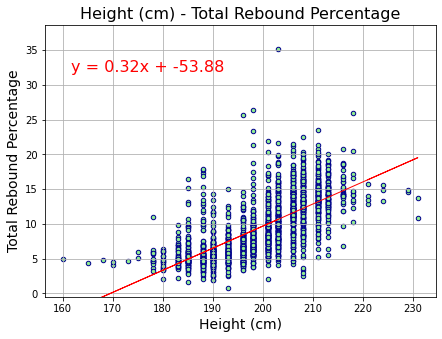

In [46]:
#Choose / change x and y axis of interest, update axis titles, and file name to save 

x = obs_corrs_phys ["Height (cm)"]
y = obs_corrs_phys ['Total Rebound Percentage']

plot_response_linrreg(x, y, "Height (cm)", 'Total Rebound Percentage', "Height (cm) - Total Rebound Percentage", "Height-TotReboundPerc")


In [47]:
# Exporting strongest correlation coefficients and their p_values into the output csv file


corr_coeff = pd.DataFrame()
pvals = pd.DataFrame()
corr_coeff  ["Independent variables"] = ["Weight (kg)", "Height (cm)", "Years Played"]
pvals  ["Independent variables"] = ["Weight (kg)", "Height (cm)", "Years Played"]
corr_coeff ['Block Percentage'] = ""
pvals ['Block Percentage'] = ""

(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Weight (kg)"], obs_corrs_phys ["Block Percentage"])
corr_coeff.iloc[0, 1] = round(rvalue, 3)
pvals.iloc[0, 1] = pvalue

corr_coeff ['Assist Percentage'] = ""
pvals ['Assist Percentage'] = ""
(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Weight (kg)"], obs_corrs_phys ["Assist Percentage"])
corr_coeff.iloc[0, 2] = round(rvalue, 3)
pvals.iloc[0, 2] = pvalue

corr_coeff ['Total Rebound Percentage'] = ""
pvals ['Total Rebound Percentage'] = ""
(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Weight (kg)"], obs_corrs_phys ["Total Rebound Percentage"])
corr_coeff.iloc[0, 3] = round(rvalue, 3)
pvals.iloc[0, 3] = pvalue

corr_coeff ['True Shooting %'] = ""
pvals ['True Shooting %'] = ""

corr_coeff ['Total Rebounds'] = ""
pvals ['Total Rebounds'] = ""
 
corr_coeff ['Personal Fouls'] = "" 
pvals ['Personal Fouls'] = "" 

corr_coeff ['Points'] = ""
pvals ['Points'] = ""

corr_coeff

,Independent variables,Block Percentage,Assist Percentage,Total Rebound Percentage,True Shooting %,Total Rebounds,Personal Fouls,Points
0,Weight (kg),0.505,-0.56,0.67,,,,
1,Height (cm),,,,,,,
2,Years Played,,,,,,,


In [48]:
pvals

,Independent variables,Block Percentage,Assist Percentage,Total Rebound Percentage,True Shooting %,Total Rebounds,Personal Fouls,Points
0,Weight (kg),1.79146e-129,7.34238e-165,1.71387e-260,,,,
1,Height (cm),,,,,,,
2,Years Played,,,,,,,


In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Height (cm)"], obs_corrs_phys ["Block Percentage"])
corr_coeff.iloc[1, 1] = round(rvalue, 3)
pvals.iloc[1, 1] = pvalue

(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Height (cm)"], obs_corrs_phys ["Assist Percentage"])
corr_coeff.iloc[1, 2] = round(rvalue, 3)
pvals.iloc[1, 2] = pvalue

(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Height (cm)"], obs_corrs_phys ["Total Rebound Percentage"])
corr_coeff.iloc[1, 3] = round(rvalue, 3)
pvals.iloc[1, 3] = pvalue
corr_coeff

,Independent variables,Block Percentage,Assist Percentage,Total Rebound Percentage,True Shooting %,Total Rebounds,Personal Fouls,Points
0,Weight (kg),0.505,-0.56,0.67,,,,
1,Height (cm),0.581,-0.646,0.682,,,,
2,Years Played,,,,,,,


In [50]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Years Played"], obs_corrs_phys ["True Shooting %"])
corr_coeff.iloc[2, 4] = round(rvalue, 3)
pvals.iloc[2, 4] = pvalue

(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Years Played"], obs_corrs_phys ["Total Rebounds"])
corr_coeff.iloc[2, 5] = round(rvalue, 3)
pvals.iloc[2, 5] = pvalue

(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Years Played"], obs_corrs_phys ["Personal Fouls"])
corr_coeff.iloc[2, 6] = round(rvalue, 3)
pvals.iloc[2, 6] = pvalue

(slope, intercept, rvalue, pvalue, stderr) = linregress(obs_corrs_phys ["Years Played"], obs_corrs_phys ["Points"])
corr_coeff.iloc[2, 7] = round(rvalue, 3)
pvals.iloc[2, 7] = pvalue

corr_coeff

,Independent variables,Block Percentage,Assist Percentage,Total Rebound Percentage,True Shooting %,Total Rebounds,Personal Fouls,Points
0,Weight (kg),0.505,-0.56,0.67,,,,
1,Height (cm),0.581,-0.646,0.682,,,,
2,Years Played,,,,0.299,0.497,0.544,0.534


In [51]:
pvals


,Independent variables,Block Percentage,Assist Percentage,Total Rebound Percentage,True Shooting %,Total Rebounds,Personal Fouls,Points
0,Weight (kg),1.79146e-129,7.34238e-165,1.71387e-260,,,,
1,Height (cm),7.23363e-181,1.12953e-235,2.27443e-273,,,,
2,Years Played,,,,2.206e-42,3.38555e-125,2.09862e-154,1.20517e-147


In [52]:
corr_coeff.to_csv("output/corr_coeffs.csv")
pvals.to_csv("output/pvals.csv")